# CAR DATA ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\marneedi jaswanth\OneDrive\Documents\K22UG SEM 5\CSM 353\uncleaned_car_data.csv")

In [3]:
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.0,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000.0,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,NaN,140000.0,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016.0,550000.0,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014.0,240000.0,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015.0,850000.0,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017.0,365000.0,78000,CNG,Individual,Manual,First Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4123 non-null   float64
 2   selling_price  3906 non-null   float64
 3   km_driven      4340 non-null   int64  
 4   fuel           4123 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


# DATA CLEANING

In [5]:
print(df.isnull().sum())

name               0
year             217
selling_price    434
km_driven          0
fuel             217
seller_type        0
transmission       0
owner              0
dtype: int64


In [6]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


# Univariate Analysis

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

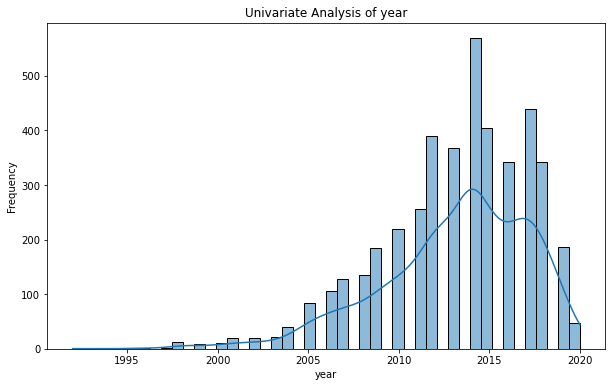

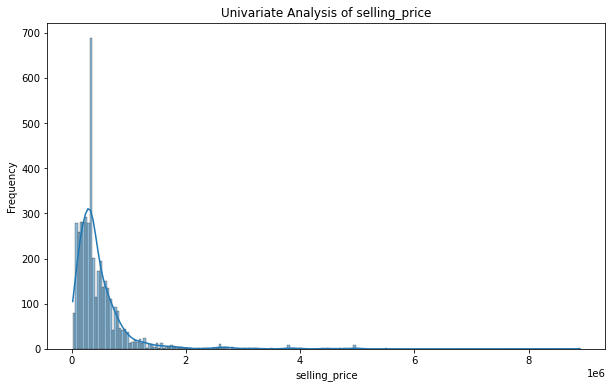

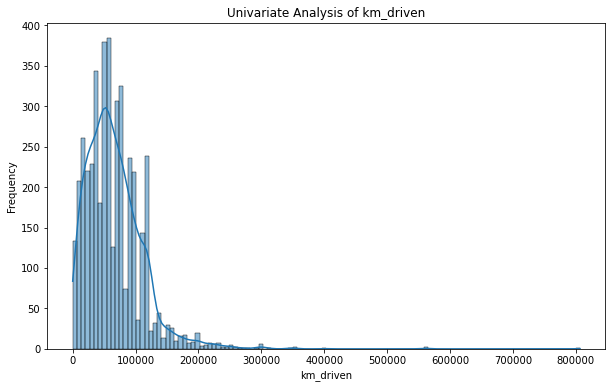

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Univariate Analysis of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Bivariate Analysis

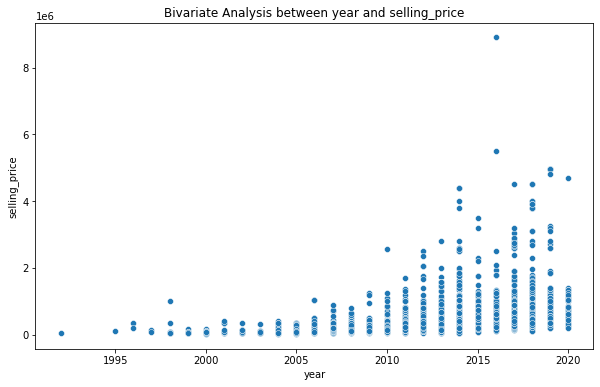

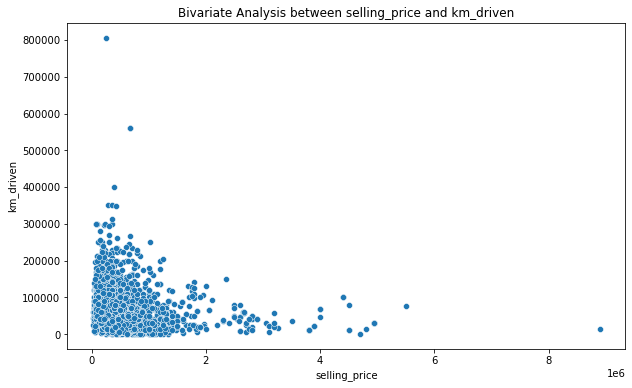

In [10]:
for i in range(len(numerical_cols) - 1):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=numerical_cols[i], y=numerical_cols[i+1])
    plt.title(f'Bivariate Analysis between {numerical_cols[i]} and {numerical_cols[i+1]}')
    plt.xlabel(numerical_cols[i])
    plt.ylabel(numerical_cols[i+1])
    plt.show()

# Multivariate Analysis

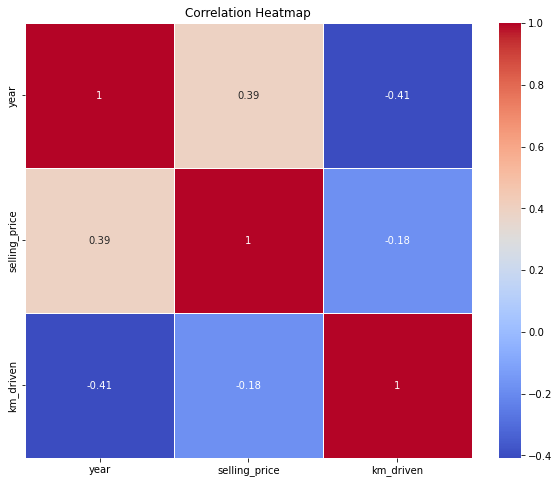

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#  Outlier Detection 

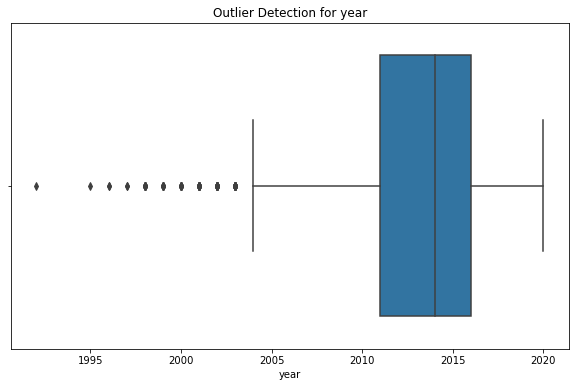

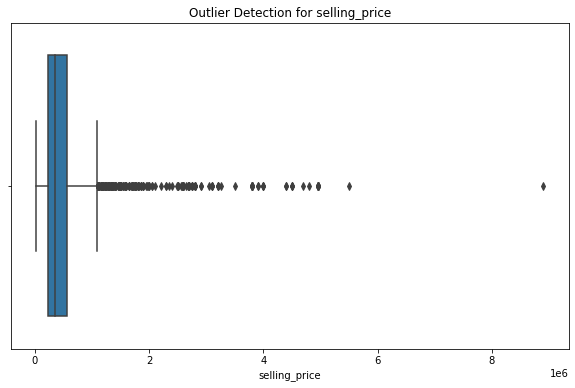

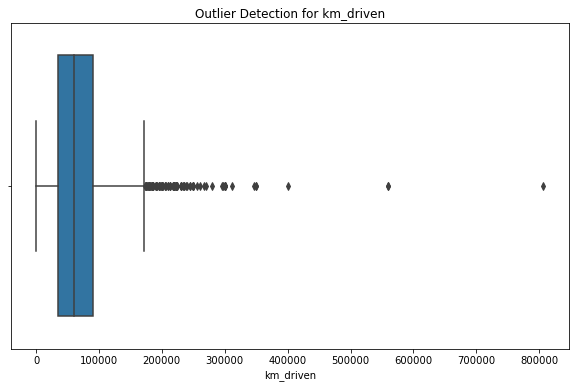

In [12]:
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection for {col}')
    plt.xlabel(col)
    plt.show()

# Handling Outlier

In [13]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Replot Boxplots

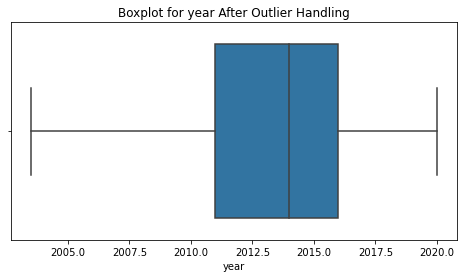

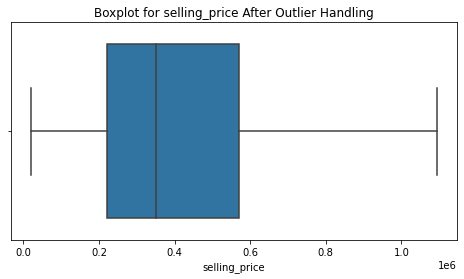

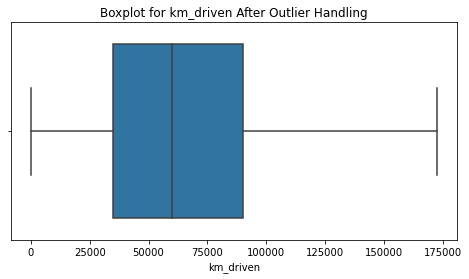

In [14]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} After Outlier Handling')
    plt.xlabel(col)
    plt.show()

# Graphical Analysis

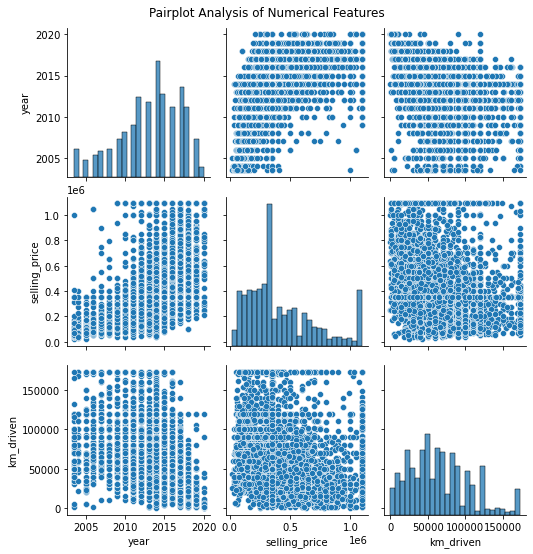

In [15]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot Analysis of Numerical Features', y=1.02)
plt.show()

# Feature Engineering

In [16]:
if len(numerical_cols) >= 2:
    df['new_feature_ratio'] = df[numerical_cols[0]] / (df[numerical_cols[1]] + 1)
    print("\nNew Feature 'new_feature_ratio' Created:")
    print(df[['new_feature_ratio']].head())
else:
    print("Insufficient numerical columns for feature engineering example.")


New Feature 'new_feature_ratio' Created:
   new_feature_ratio
0           0.033449
1           0.014867
2           0.003353
3           0.008068
4           0.004476


# Summary of Features

In [17]:
print("\nSummary Statistics of Dataset:")
print(df.describe())

print("\nFeature Insights:")
for col in numerical_cols:
    print(f"{col} - Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}, Std Dev: {df[col].std():.2f}")


Summary Statistics of Dataset:
              year  selling_price      km_driven  new_feature_ratio
count  4340.000000   4.340000e+03    4340.000000        4340.000000
mean   2013.202419   4.250236e+05   64711.526267           0.008011
std       3.922149   2.790456e+05   39833.930145           0.007467
min    2003.500000   2.000000e+04       1.000000           0.001837
25%    2011.000000   2.210000e+05   35000.000000           0.003540
50%    2014.000000   3.500000e+05   60000.000000           0.005754
75%    2016.000000   5.700000e+05   90000.000000           0.009095
max    2020.000000   1.093500e+06  172500.000000           0.100245

Feature Insights:
year - Mean: 2013.20, Median: 2014.00, Std Dev: 3.92
selling_price - Mean: 425023.63, Median: 350000.00, Std Dev: 279045.57
km_driven - Mean: 64711.53, Median: 60000.00, Std Dev: 39833.93
